# Tathagata Mookherjee<br>
ROLL NUMBER - M21AI619<br>
Machine Learning Fractal 3, Assignment 1<br>
IIT JODHPUR<br>

Output from optimum parameters..
SL No: 1; Epochs: 20; Hidden sizes: [1024, 512, 256]; Learning rate: 0.05; Loss Function: NLLLoss(); Predicted Digit: 1; Model Accuracy%: 95.50561797752809
SL No: 1; Epochs: 20; Hidden sizes: [1024, 512, 256]; Learning rate: 0.05; Loss Function: NLLLoss(); Predicted Digit: 5; Model Accuracy%: 95.50561797752809
SL No: 1; Epochs: 20; Hidden sizes: [1024, 512, 256]; Learning rate: 0.05; Loss Function: NLLLoss(); Predicted Digit: 7; Model Accuracy%: 95.50561797752809


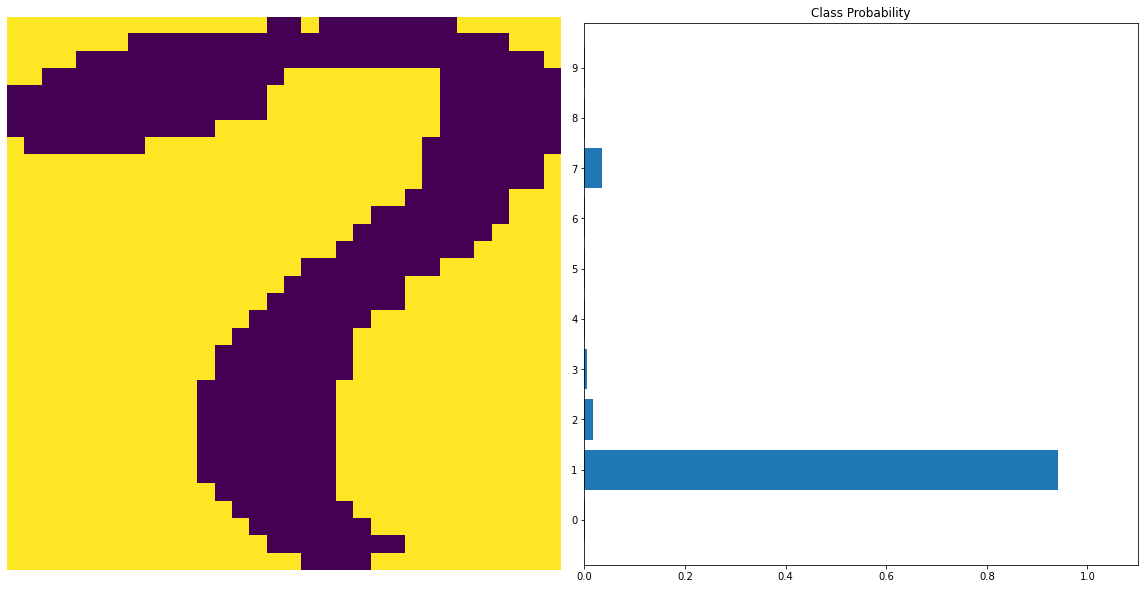

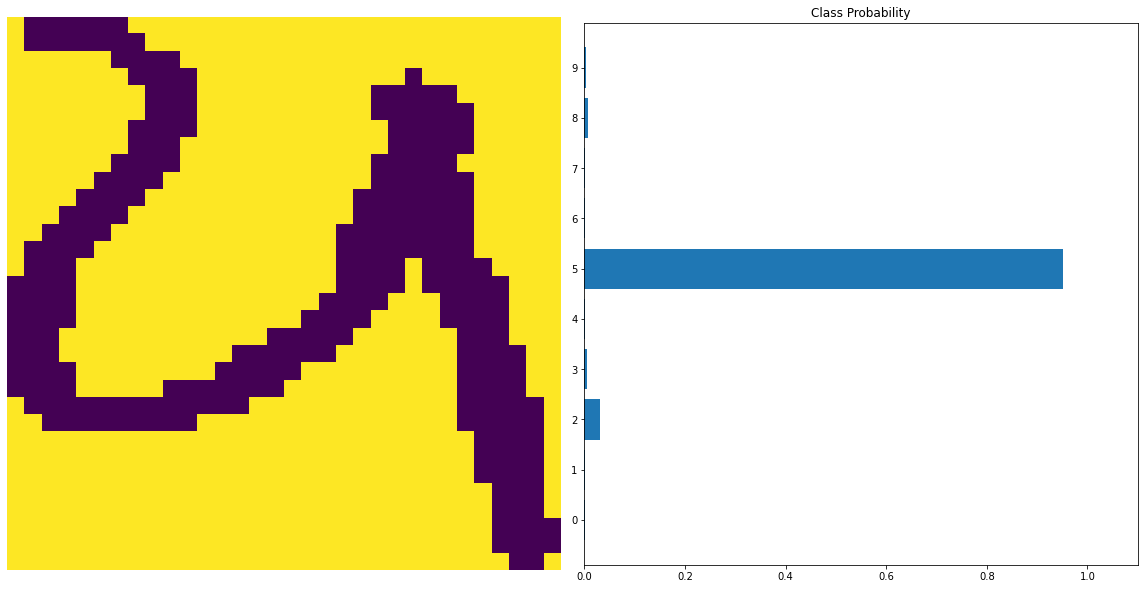

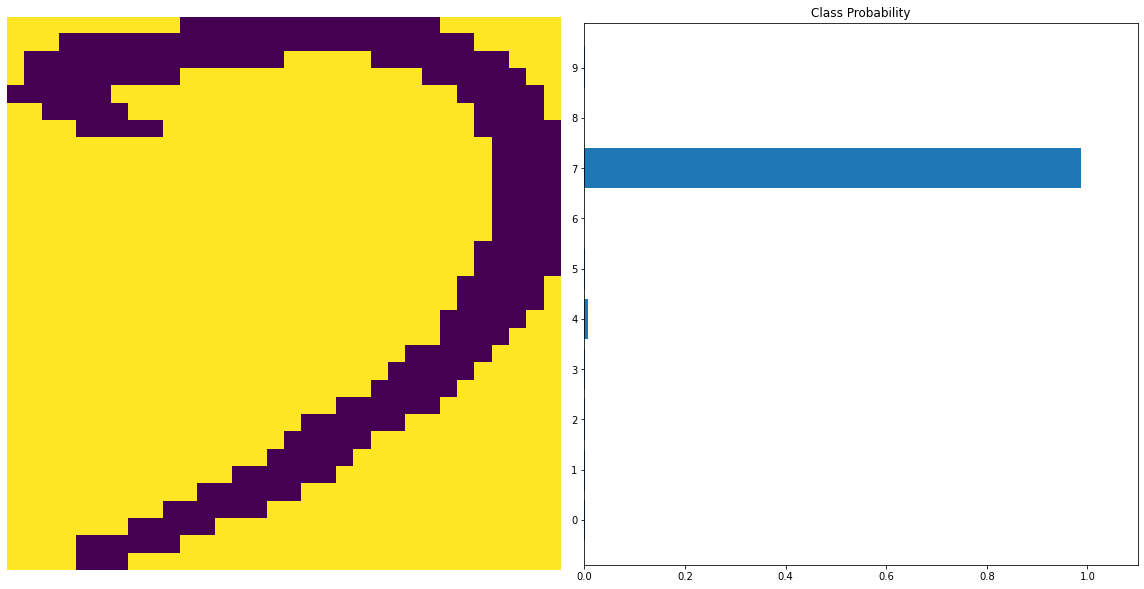

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

################################
#set path to image folders
folder_train='P2Q3/train'
folder_validate='P2Q3/val'
################################

# Function for viewing an image
def plot_it(img, ps):
    ps = ps.data.numpy().squeeze()
    fig, (ax1, ax2) = plt.subplots(figsize=(16,9), ncols=2)
    ax1.imshow(img.resize_(1,32,32).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

def get_data():
    transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])
    trainset = datasets.ImageFolder(folder_train, transform=transform)
    valset = datasets.ImageFolder(folder_validate, transform=transform)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
    valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)
    return trainloader, valloader

def run_network(epochs, hidden_sizes, learning_rate, criterion, sl_counter):
    # Learning details for the network
    input_size = 3072
    output_size = 10
    trainloader, valloader = get_data()
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    num_of_images = 60

    #create the network
    model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                        nn.ReLU(),
                        nn.Linear(hidden_sizes[1], hidden_sizes[2]),
                        nn.Sigmoid(),
                        nn.Linear(hidden_sizes[2], output_size),
                        nn.LogSoftmax(dim=1))

    #train the network
    images, labels = next(iter(trainloader))
    images = images.view(images.shape[0], -1)
    logps = model(images)
    loss = criterion(logps, labels)
    loss.backward()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5)
    images, labels = next(iter(trainloader))
    images.resize_(64, 3072)
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()    
    for e in range(epochs):
        running_loss = 0
        for images, labels in trainloader:
            images = images.view(images.shape[0], -1)
            optimizer.zero_grad()
            output = model(images)
            loss = criterion(output, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

    #validate the network
    images, labels = next(iter(valloader))
    img = images[0].view(1, 3072)
    with torch.no_grad():
        logps = model(img)
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    correct_count, all_count = 0, 0

    for images,labels in valloader:
        for i in range(len(labels)):
            img = images[i].view(1, 3072)
            with torch.no_grad():
                logps = model(img)
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if(true_label == pred_label):
                correct_count += 1
            all_count += 1

    print('SL No: '+str(sl_counter)+'; Epochs: '+str(epochs)+'; Hidden sizes: '+str(hidden_sizes)+'; Learning rate: '+str(learning_rate)+'; Loss Function: '+str(criterion)+'; Predicted Digit: '+str(probab.index(max(probab)))+'; Model Accuracy%: '+str((correct_count/all_count*100)))
    plot_it(img.view(3, 32, 32), ps)


#search for the optimum parameters
# print('Output from testing parameteres..')
# epoch_array = [10, 20, 30, 40]
# hidden_size_array = [[2048, 1024, 512], [1024, 512, 256]]
# learning_rate_array=[0.05, 0.03]
# criterion_array = [nn.NLLLoss(), nn.CrossEntropyLoss(), nn.MultiMarginLoss()]
#search for the optimum parameters

#optimum parameters
print('Output from optimum parameters..')
epoch_array = [20]
hidden_size_array = [[1024, 512, 256]]
learning_rate_array=[0.05]
criterion_array = [nn.NLLLoss()]
#optimum parameters

#execution block
sl_counter=0
for epochs in epoch_array:
    for criterion in criterion_array:
        for hidden_sizes in hidden_size_array:
            for learning_rate in learning_rate_array:
                sl_counter = sl_counter + 1
                run_network(epochs, hidden_sizes, learning_rate, criterion, sl_counter) #1st test
                run_network(epochs, hidden_sizes, learning_rate, criterion, sl_counter) #2nd test
                run_network(epochs, hidden_sizes, learning_rate, criterion, sl_counter) #3rd test


